<span STYLE="font-size:200%"> 
    Barplot 2 groups
</span>

Docker image: gnasello/datascience-env:2024-06-12\
Latest update: 12 June 2024

# Load required packages

In [1]:
library(ggplot2)
library(dplyr)
library(ggplotUtils)
library(statsUtils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

In [2]:
filetable <- 'data.csv'

title <- 'Plot Title'
xlabel <- ' '
ylabel <- 'Burst Release (%)'
xlabels_ordered <- c('20 μg AS', '100 μg AS') # Check labels in data.csv file
scale_color_manual.values <- c("#e66d5cff", "#6bc2d5ff")

df <- read.csv(filetable)
head(df)
tail(df)

,y,x
,<dbl>,<chr>
1,88.68740,20 μg AS
2,87.15051,20 μg AS
3,83.32697,20 μg AS
4,30.93725,100 μg AS
5,29.73967,100 μg AS
6,29.11168,100 μg AS


,y,x
,<dbl>,<chr>
2,87.15051,20 μg AS
3,83.32697,20 μg AS
4,30.93725,100 μg AS
5,29.73967,100 μg AS
6,29.11168,100 μg AS
7,29.39600,100 μg AS


## Order x labels

Order data frame rows according to vector with specific order

In [3]:
if (exists("xlabels_ordered")) {
    df <- df %>%
            mutate(x = factor(x, levels=xlabels_ordered))
    }

# Bar plot of `y` over `x`

## Summarize the data

The function below will be used to calculate the mean and the standard deviation, for the variable of interest, in each group. See [tutorial](http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization#line-graph-with-error-bars)

In [4]:
df_summary <- data_summary(df, varname='y',
                           groupnames=c('x'))
df_summary

x,mean,sd
<fct>,<dbl>,<dbl>
20 μg AS,86.38829,2.760303
100 μg AS,29.79615,0.802893


## Bar plot with point data

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


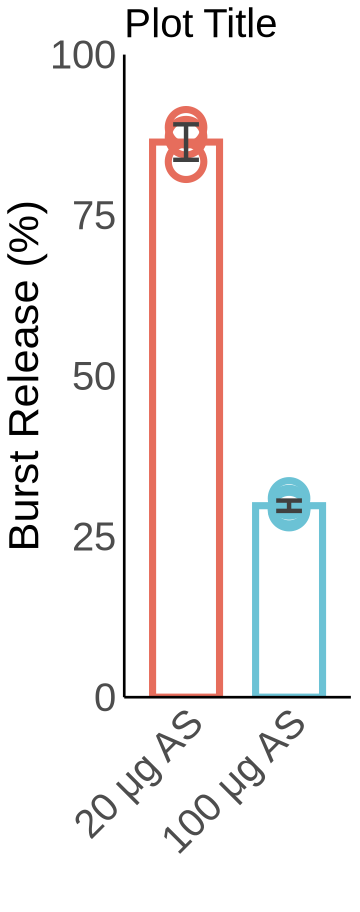

In [5]:
color='#404040ff'

ylim <- c(0,100)
width=3
height=7.6

p <- ggplot() +
     geom_bar(data=df_summary, aes(x=x, y=mean, color=x), fill="white", stat = "identity", width = 0.65, linewidth=2) +  
     geom_point(data=df, aes(x = x, y = y, color=factor(x)), size=8, stroke=3, shape=1) +
     geom_errorbar(data=df_summary, aes(x=x, y=mean, ymin=mean-sd, ymax=mean+sd), width=.25, linewidth=1.25, color=color)

img <- ggplotMinAethetics(p, width=width, height=height,
                           title=title,
                           plot.title = element_text(size = 24),
                           axis.text=element_text(size=24),
                           axis.title=element_text(size=26),
                           xlabel = xlabel, 
                           ylabel= ylabel, 
                           ylim = ylim,
                           x.text.angle=45,
                           scale_color_manual.values = scale_color_manual.values,
                           legend.position="none"
                          ) + 
            theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
                  axis.line.x.bottom=element_line(linewidth=0.75),
                  axis.line.y.left=element_line(linewidth=0.75))

img

# Export plot

In [6]:
filename <- tools::file_path_sans_ext(filetable)
filename

[1] "data"

## `.png` file

In [7]:
fileoutput <- paste(filename,'.png', sep='')
fileoutput

[1] "data.png"

In [8]:
ggsave(file=fileoutput, plot=img, width=width, height=height, bg = 'white')

## `.svg` file

In [9]:
fileoutput <- paste(filename,'.svg', sep='')
fileoutput

[1] "data.svg"

In [10]:
ggsave(file=fileoutput, plot=img, width=width, height=height)